### Chapter 3 Exercise 8

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [2]:
# import data visualisation tools
import matplotlib.pyplot as plt
import xkcd
%matplotlib inline
# from matplotlib import pylab
# import plotly.plotly as py
# import plotly.graph_objs as go
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 10)


In [3]:
# import and view first 10 items of file
# url = "/Users/arpanganguli/Documents/Finance/ISLR/Datasets/Auto.csv"
url = "../../Data/Auto.csv"
Auto = pd.read_csv(url)

In [4]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
list(Auto)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [6]:
# verify missing values
Auto.isnull().sum().sum()

0

In [7]:
# Auto = Auto.drop(Auto.index[[32, 126, 330, 336, 354]]) # removing rows containing "?". This is the easy way out. Such missing values need to be explored first in a real life situation.

In [32]:
Auto.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,397.0,23.515869,7.825804,9.0,17.5,23.0,29.0,46.6
cylinders,397.0,5.458438,1.701577,3.0,4.0,4.0,8.0,8.0
displacement,397.0,193.532746,104.379583,68.0,104.0,146.0,262.0,455.0
horsepower,397.0,104.196474,38.357393,46.0,75.0,93.0,125.0,230.0
weight,397.0,2970.261965,847.904119,1613.0,2223.0,2800.0,3609.0,5140.0
acceleration,397.0,15.555668,2.749995,8.0,13.8,15.5,17.1,24.8
year,397.0,75.994962,3.690005,70.0,73.0,76.0,79.0,82.0
origin,397.0,1.574307,0.802549,1.0,1.0,1.0,2.0,3.0


array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

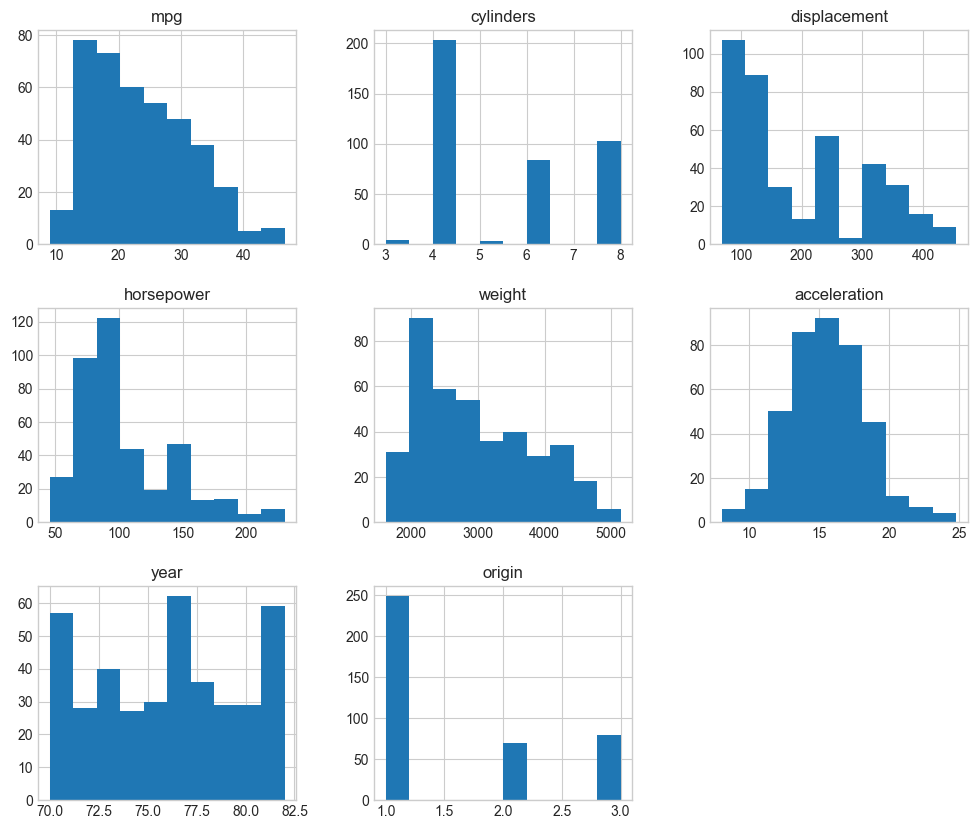

In [33]:
Auto.hist()

In [8]:
# run regression (I am not visualising the data for the sake of brevity. But it is highly recommended as first step afer importing data)
y = Auto.mpg.astype(float)
x = Auto.horsepower.astype(float)
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     603.4
Date:                Mon, 04 Sep 2023   Prob (F-statistic):           1.50e-81
Time:                        10:39:34   Log-Likelihood:                -1195.5
No. Observations:                 397   AIC:                             2395.
Df Residuals:                     395   BIC:                             2403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0426      0.717     55.862      0.000      38.633      41.452
horsepower    -0.1586      0.006    -24.565      0.000      -0.171      -0.146
==============================================================================
Omnibus:                       16.479   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.349
Skew:                           0.494   Prob(JB):                     0.000171
Kurtosis:                       3.271   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# RSE (residual standard error)
model.resid.std(ddof=X.shape[1])

4.928554656293288

In [14]:
values = slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [30]:
print(f'Slope: {values[0]:.4f}')
print(f'Intercept (constant): {values[1]:.4f}')
print(f'R-value (Pearson coefficient): {values[2]:.4f}')
print(f'R-squared (coefficient of determination): {values[2]**2:.4f}')
print(f'p-value: {values[3]:.4f}')
print(f'Standard error: {values[4]:.4f}')

Slope: -0.1586
Intercept (constant): 40.0426
R-value (Pearson coefficient): -0.7774
R-squared (coefficient of determination): 0.6044
p-value: 0.0000
Standard error: 0.0065


In [24]:
# sklearn ordinary linear regression
X1 = Auto[['horsepower']]
Y1 = Auto['mpg']
lm = LinearRegression().fit(X1, Y1)

In [25]:
# lm.coef_

In [27]:
print("Coefficients: ", lm.coef_)
print("Intercepts: ", lm.intercept_)
Y2 = [[98]]
predictions = lm.predict(Y2)
print("Predicted value at X = 98: ", predictions)

Coefficients:  [-0.15861101]
Intercepts:  40.0425765603105
Predicted value at X = 98:  [24.49869792]


### Prediction and confidence intervals when horsepower (X) = 98

In [28]:
# confidence interval/prediction confidence interval (statsmodels)
new_data = np.array([1, 98])
pred = model.get_prediction(new_data)
pred.summary_frame(alpha = 0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.498698,0.250572,24.006076,24.991319,14.796705,34.200691


<Figure size 2500x1000 with 0 Axes>

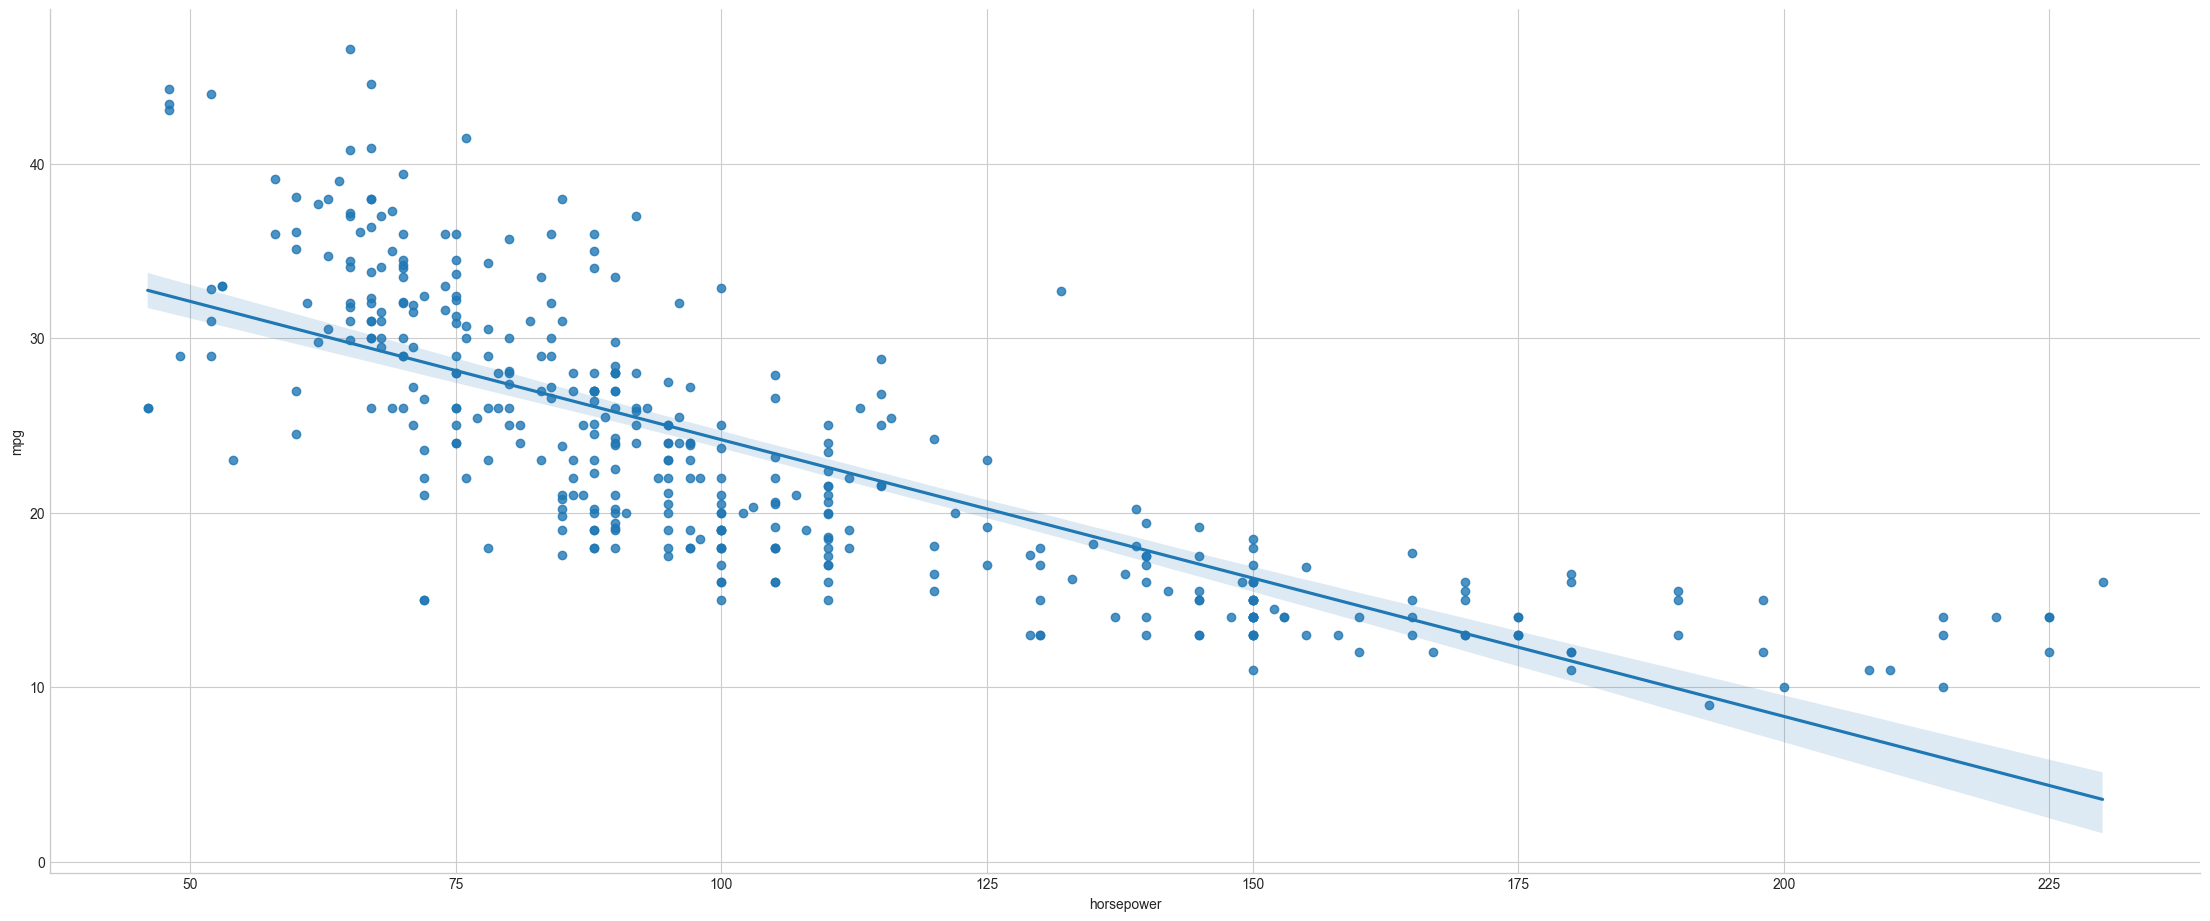

In [29]:
# plot relationships
# plt.xkcd()
plt.figure(figsize=(25, 10))
plotdata = pd.concat([x, y], axis = 1)
sns.lmplot(x = "horsepower", y = "mpg", data = plotdata)
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.show()

**a.i. Given the F-Statistic > 1 and p-value of that F-Statistic is close to 0 (and << 0.005), there is a statistically significant
   relationship between mpg and horespower.**

**a.ii. To determine the strength of the relationship between the predictor (horsepower) and response (mpg), we need to calculate the ratio of the RSE of the predictor (as determined by the model) and the mean of the response, since it would show how strongly it actually predicts the true values of the response. (Another way would be to show R^2 since it would determine how much the regressed model actually explains the true values of the response). The RSE is 4.928554 and the mean of mpg is 23.515896, which means the percentage error is 20.958393%. The R^2 value is 0.604 or 60.4%.**

**a.iii. Negative relationship. An increase in horsepower is related to a decrease in mpg.**

**a.iv. 24.4986**

### Residual diagnostic plots
#### Source: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/09_regression.html

#### Residuals histogram

<Axes: ylabel='Count'>

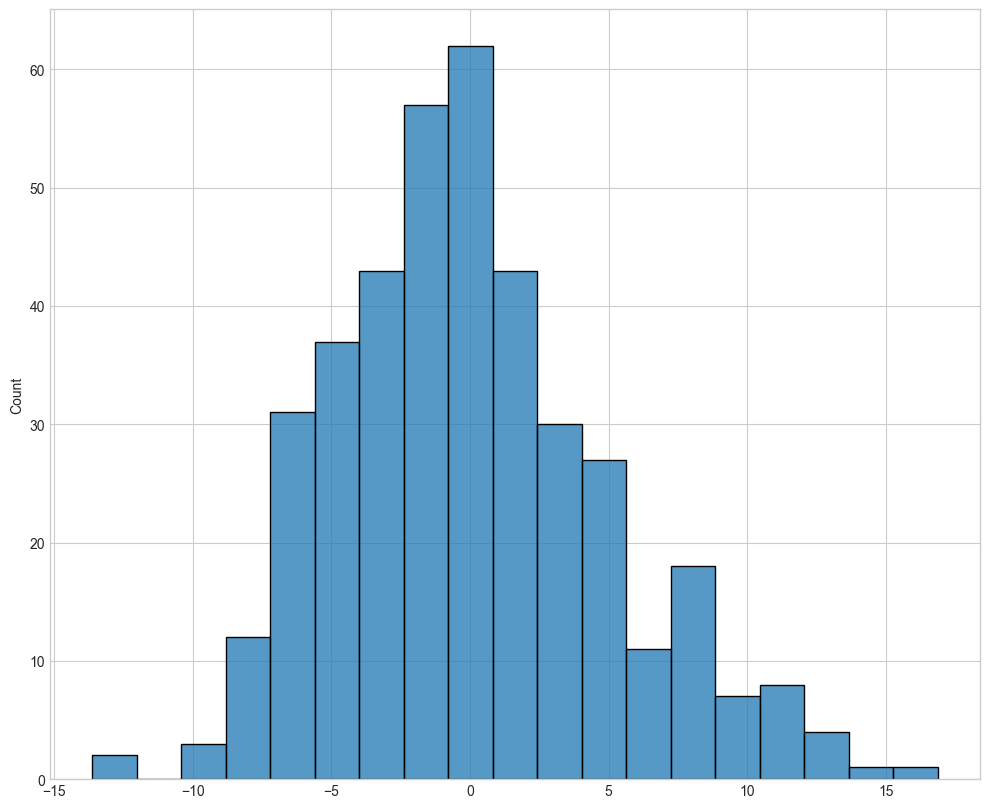

In [34]:
sns.histplot(model.resid)

In [35]:
# calculate mean (mu) and standard deviation (std) for residuals distribution
mu, std = stats.norm.fit(model.resid)
print(mu, std)

-1.4175059111385374e-14 4.916124486044523


In [36]:
# Shapiro-Wilk noramlity test
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9817615151405334, pvalue=6.613603181904182e-05)

#### Q-Q plot

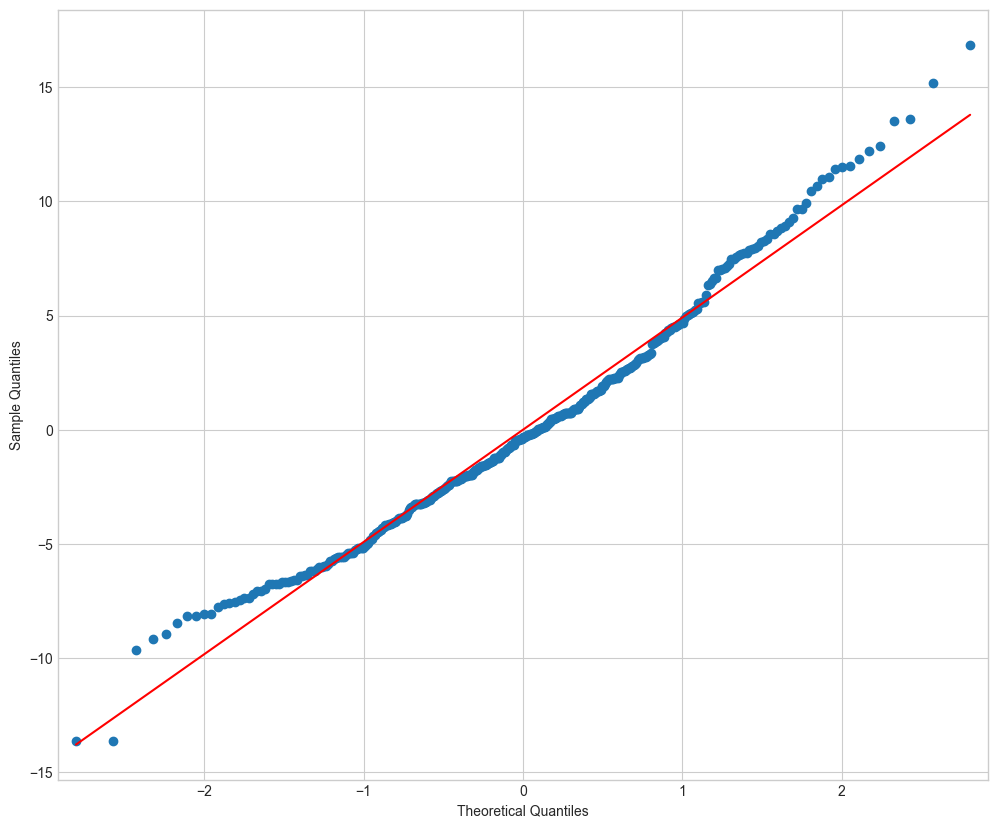

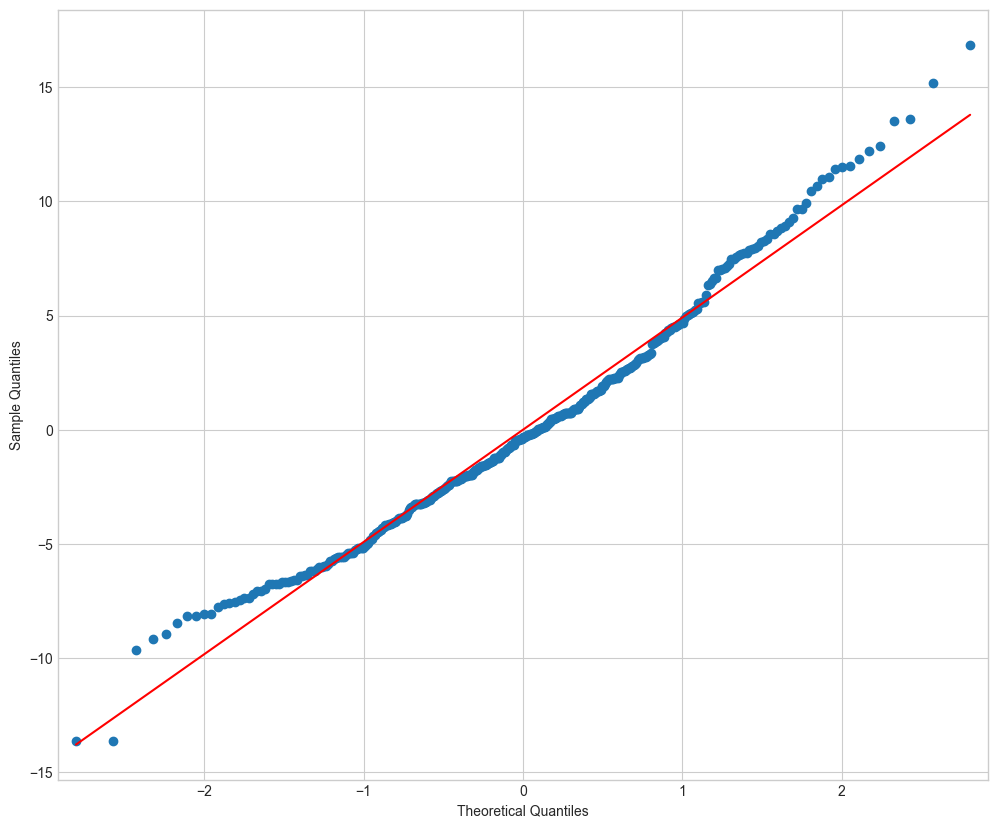

In [37]:
sm.qqplot(model.resid, line='s')